<a href="https://colab.research.google.com/github/Salva13s/Entrega2/blob/main/trabajo_se%C3%B1as.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os

In [4]:
ruta_principal = "/content/drive/MyDrive/tópico 1 ml/archiveseñas" #<---- esta ruta depende de donde este guardado el set de datos

CAMBIAR DE CARPETA LAS IMAGENES PARA MAS COMODIDAD

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

In [6]:
import shutil

ruta_train = os.path.join(ruta_principal, "train")
ruta_test = os.path.join(ruta_principal, "test")

carpeta_destino_train = "/content/dataset/train"

carpeta_destino_test = "/content/dataset/test"


if not os.path.exists(carpeta_destino_train):
    os.makedirs(carpeta_destino_train)
if not os.path.exists(carpeta_destino_test):
    os.makedirs(carpeta_destino_test)


for letra in os.listdir(ruta_train):
    ruta_letra = os.path.join(ruta_train, letra)
    for imagen in os.listdir(ruta_letra):
        ruta_imagen = os.path.join(ruta_letra, imagen)
        carpeta_letra_destino = os.path.join(carpeta_destino_train, letra)
        if not os.path.exists(carpeta_letra_destino):
            os.makedirs(carpeta_letra_destino)
        shutil.copy(ruta_imagen, os.path.join(carpeta_letra_destino, imagen))


for letra in os.listdir(ruta_test):
    ruta_letra = os.path.join(ruta_test, letra)
    for imagen in os.listdir(ruta_letra):
        ruta_imagen = os.path.join(ruta_letra, imagen)
        carpeta_letra_destino = os.path.join(carpeta_destino_test, letra)
        if not os.path.exists(carpeta_letra_destino):
            os.makedirs(carpeta_letra_destino)
        shutil.copy(ruta_imagen, os.path.join(carpeta_letra_destino, imagen))


CARACTERISTICAS DE LAS IMAGENES


In [7]:
from PIL import Image

img_path = '/content/dataset/test/C/20190522_232842.jpg' # <------ al cambiar la ruta podemos ver que las imagenes son todas distintas en tamaño

img = Image.open(img_path)

original_size = img.size
original_mode = img.mode

print(f'Tamaño original de la imagen: {original_size}')
print(f'Modo original de la imagen: {original_mode}')

img.show()


Tamaño original de la imagen: (3264, 2448)
Modo original de la imagen: RGB


#CNN CLASICA

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

NUM_CLASSES = 21

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(480, 480, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(NUM_CLASSES, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy',"AUC","TruePositives","TrueNegatives","FalsePositives","FalseNegatives"])


train_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    '/content/dataset/train',
    target_size=(480, 480),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    '/content/dataset/test',
    target_size=(480, 480),
    batch_size=32,
    class_mode='categorical'
)

early_stopping_callback = EarlyStopping(monitor='loss', patience=3)
#Entrenar el modelo
H = model.fit(train_generator, epochs=100, validation_data=test_generator, callbacks=[early_stopping_callback])


Found 176 images belonging to 21 classes.
Found 63 images belonging to 21 classes.
Epoch 1/100
6/6 [==============================] - 23s 1s/step - loss: 38.7131 - accuracy: 0.0568 - auc: 0.5063 - true_positives: 8.0000 - true_negatives: 3384.0000 - false_positives: 136.0000 - false_negatives: 168.0000 - val_loss: 10.9745 - val_accuracy: 0.0476 - val_auc: 0.4981 - val_true_positives: 0.0000e+00 - val_true_negatives: 1241.0000 - val_false_positives: 19.0000 - val_false_negatives: 63.0000
Epoch 2/100
6/6 [==============================] - 6s 1s/step - loss: 5.6763 - accuracy: 0.0852 - auc: 0.5234 - true_positives: 1.0000 - true_negatives: 3503.0000 - false_positives: 17.0000 - false_negatives: 175.0000 - val_loss: 3.2492 - val_accuracy: 0.0476 - val_auc: 0.4898 - val_true_positives: 0.0000e+00 - val_true_negatives: 1260.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 63.0000
Epoch 3/100
6/6 [==============================] - 6s 1s/step - loss: 2.9303 - accuracy: 0.1307 - au

Predicciones CNN clasica

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

#Diccionario que mapea las clases a las letras correspondientes
clase_a_letra = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E',5: 'F', 6: 'H', 7: 'I', 8: 'K', 9: 'L', 10: 'M', 11: 'N', 12: 'O',13: 'P', 14: 'Q', 15: 'R', 16: 'T',
    17: 'U', 18: 'V', 19: 'W', 20: 'Y'}

1/1 [==============================] - 0s 91ms/step


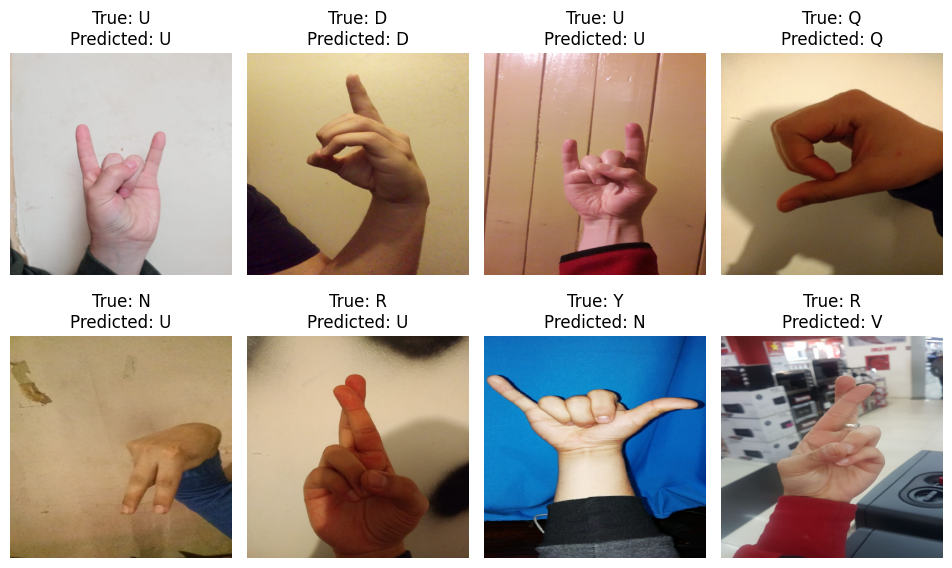

In [34]:
correctly_predicted = []
incorrectly_predicted = []

for i in range(len(test_generator)):
    batch, labels = test_generator[i]
    predictions = model.predict(batch)

    for j in range(len(labels)):
        true_class = np.argmax(labels[j])
        predicted_class = np.argmax(predictions[j])

        if true_class == predicted_class:
            correctly_predicted.append((batch[j], true_class))
        else:
            incorrectly_predicted.append((batch[j], true_class, predicted_class))

plt.figure(figsize=(12, 6))
for i in range(4):
    plt.subplot(2, 5, i + 1)
    plt.imshow(correctly_predicted[i][0])
    true_letter = clase_a_letra[correctly_predicted[i][1]]
    plt.title(f'True: {clase_a_letra[correctly_predicted[i][1]]}\nPredicted: {clase_a_letra[correctly_predicted[i][1]]}')
    plt.axis('off')


for i in range(4):
    plt.subplot(2, 5, i + 6)
    plt.imshow(incorrectly_predicted[i][0])
    true_letter = clase_a_letra[incorrectly_predicted[i][1]]
    predicted_letter = clase_a_letra[incorrectly_predicted[i][2]]
    plt.title(f'True: {true_letter}\nPredicted: {predicted_letter}')
    plt.axis('off')

plt.tight_layout()
plt.show()

Metricas CNN clasica

In [11]:
import matplotlib.pyplot as plt
history_dict = H.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'auc', 'true_positives', 'true_negatives', 'false_positives', 'false_negatives', 'val_loss', 'val_accuracy', 'val_auc', 'val_true_positives', 'val_true_negatives', 'val_false_positives', 'val_false_negatives'])


In [12]:
print("Perdida en set de entrenamiento",history_dict["loss"][len(history_dict["loss"])-1])
print("Perdida en set de validacion",history_dict["val_loss"][len(history_dict["val_loss"])-1])
print("------------------------------------------------------------------------------------")
print("Accuracy en set de entrenamiento",history_dict["accuracy"][len(history_dict["accuracy"])-1])
print("Accuracy en set de validacion",history_dict["val_accuracy"][len(history_dict["val_accuracy"])-1])
print("------------------------------------------------------------------------------------")
print("Auc en set de entrenamiento",history_dict["auc"][len(history_dict["auc"])-1])
print("Auc en set de validacion",history_dict["val_auc"][len(history_dict["val_auc"])-1])


Perdida en set de entrenamiento 8.568156886212819e-07
Perdida en set de validacion 7.779882907867432
------------------------------------------------------------------------------------
Accuracy en set de entrenamiento 1.0
Accuracy en set de validacion 0.1269841343164444
------------------------------------------------------------------------------------
Auc en set de entrenamiento 1.0
Auc en set de validacion 0.5781682729721069


In [13]:
print("Verdaderos negativos set entrenamiento: ",history_dict["true_negatives"][len(history_dict["true_negatives"])-1])
print("------------------------------------------------")
print("Verdaderos negativos set de testeo: ",history_dict["val_true_negatives"][len(history_dict["val_true_negatives"])-1])
print("------------------------------------------------")
print("Verdaderos positivos set entrenamiento: ",history_dict["true_positives"][len(history_dict["true_positives"])-1])
print("------------------------------------------------")
print("Verdaderos positivos set de testeo: ",history_dict["val_true_positives"][len(history_dict["val_true_positives"])-1])
print("------------------------------------------------")
print("Falsos negativos set entrenamiento: ",history_dict["false_negatives"][len(history_dict["false_negatives"])-1])
print("------------------------------------------------")
print("Falsos negativos set de testeo: ",history_dict["val_false_negatives"][len(history_dict["val_false_negatives"])-1])
print("------------------------------------------------")
print("Falsos positivos set entrenamiento: ",history_dict["false_positives"][len(history_dict["false_positives"])-1])
print("------------------------------------------------")
print("Falsos positivos set de testeo: ",history_dict["val_false_positives"][len(history_dict["val_false_positives"])-1])

Verdaderos negativos set entrenamiento:  3520.0
------------------------------------------------
Verdaderos negativos set de testeo:  1213.0
------------------------------------------------
Verdaderos positivos set entrenamiento:  176.0
------------------------------------------------
Verdaderos positivos set de testeo:  6.0
------------------------------------------------
Falsos negativos set entrenamiento:  0.0
------------------------------------------------
Falsos negativos set de testeo:  57.0
------------------------------------------------
Falsos positivos set entrenamiento:  0.0
------------------------------------------------
Falsos positivos set de testeo:  47.0


Graficos CNN clasica

<Figure size 640x480 with 0 Axes>

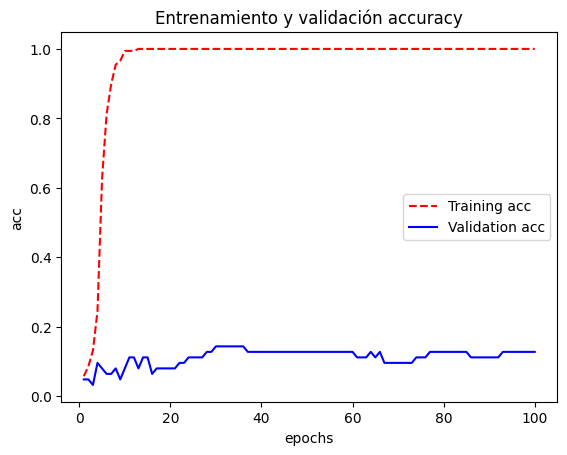

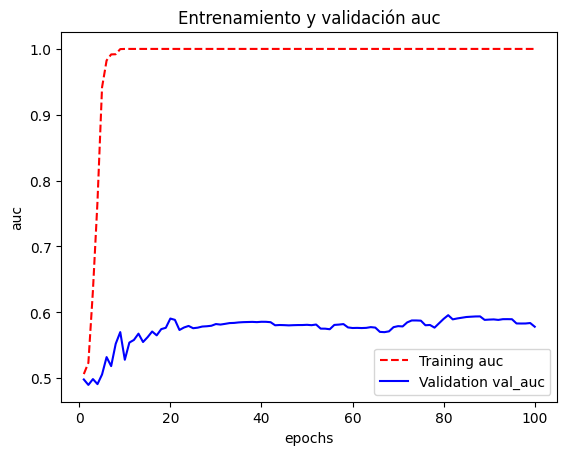

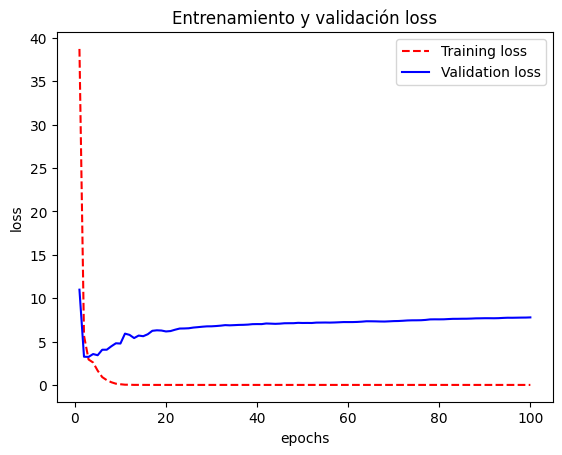

<Figure size 640x480 with 0 Axes>

In [14]:
import matplotlib.pyplot as plt
acc      = H.history[     'accuracy' ]
val_acc  = H.history[ 'val_accuracy' ]
loss     = H.history[    'loss' ]
val_loss = H.history['val_loss' ]
auc = H.history["auc"]
val_auc = H.history['val_auc']

epochs   = range(1,len(acc)+1,1)

plt.plot ( epochs,     acc, 'r--', label='Training acc'  )
plt.plot ( epochs, val_acc,  'b', label='Validation acc')
plt.title ('Entrenamiento y validación accuracy')
plt.ylabel('acc')
plt.xlabel('epochs')

plt.legend()
plt.figure()

plt.plot ( epochs,     auc, 'r--', label='Training auc'  )
plt.plot ( epochs, val_auc,  'b', label='Validation val_auc')
plt.title ('Entrenamiento y validación auc')
plt.ylabel('auc')
plt.xlabel('epochs')

plt.legend()
plt.figure()

plt.plot ( epochs,     loss, 'r--' , label='Training loss'  )
plt.plot ( epochs, val_loss ,  'b', label='Validation loss' )
plt.title ('Entrenamiento y validación loss'   )
plt.ylabel('loss')
plt.xlabel('epochs')

plt.legend()
plt.figure()

#TRANSFER LEARNING VGG16

In [15]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.applications import VGG16
from tensorflow.keras.callbacks import EarlyStopping

In [16]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(480, 480, 3))

base_model.trainable = False

model2 = keras.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(NUM_CLASSES, activation='softmax')
])

model2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy',"AUC","TruePositives","TrueNegatives","FalsePositives","FalseNegatives"])

H2 = model2.fit(train_generator, epochs=100, validation_data=test_generator, callbacks=[early_stopping_callback])

58889256/58889256 [==============================] - 0s 0us/step
Epoch 1/100
6/6 [==============================] - 58s 7s/step - loss: 17.5454 - accuracy: 0.0284 - auc: 0.4986 - true_positives: 4.0000 - true_negatives: 3387.0000 - false_positives: 133.0000 - false_negatives: 172.0000 - val_loss: 14.1179 - val_accuracy: 0.0476 - val_auc: 0.5108 - val_true_positives: 3.0000 - val_true_negatives: 1200.0000 - val_false_positives: 60.0000 - val_false_negatives: 60.0000
Epoch 2/100
6/6 [==============================] - 7s 1s/step - loss: 8.9681 - accuracy: 0.1989 - auc: 0.6583 - true_positives: 30.0000 - true_negatives: 3398.0000 - false_positives: 122.0000 - false_negatives: 146.0000 - val_loss: 9.0486 - val_accuracy: 0.0476 - val_auc: 0.5382 - val_true_positives: 3.0000 - val_true_negatives: 1201.0000 - val_false_positives: 59.0000 - val_false_negatives: 60.0000
Epoch 3/100
6/6 [==============================] - 8s 1s/step - loss: 4.3844 - accuracy: 0.2841 - auc: 0.7814 - true_positives:

1/1 [==============================] - 0s 206ms/step


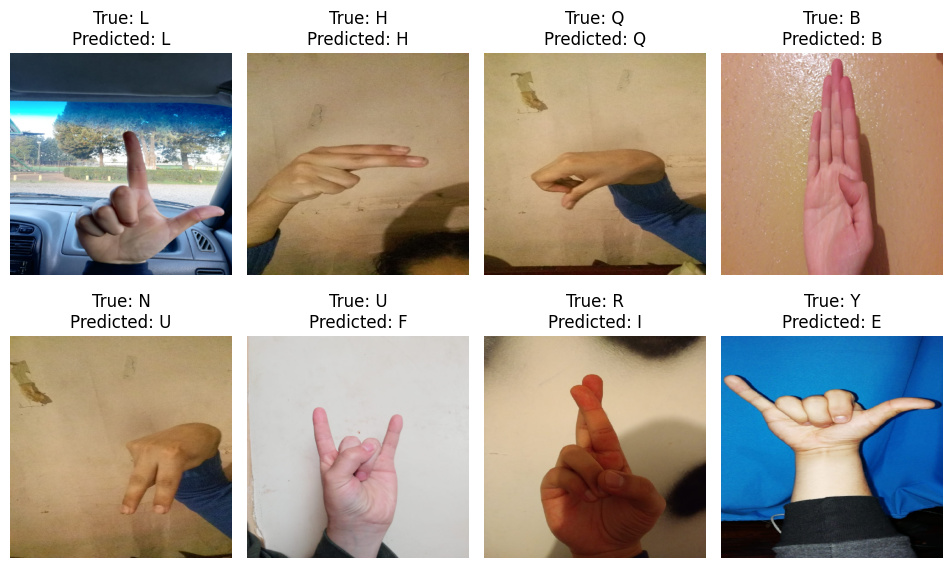

In [17]:
correctly_predicted = []
incorrectly_predicted = []

for i in range(len(test_generator)):
    batch, labels = test_generator[i]
    predictions = model2.predict(batch)

    for j in range(len(labels)):
        true_class = np.argmax(labels[j])
        predicted_class = np.argmax(predictions[j])

        if true_class == predicted_class:
            correctly_predicted.append((batch[j], true_class))
        else:
            incorrectly_predicted.append((batch[j], true_class, predicted_class))


plt.figure(figsize=(12, 6))
for i in range(4):
    plt.subplot(2, 5, i + 1)
    plt.imshow(correctly_predicted[i][0])
    true_letter = clase_a_letra[correctly_predicted[i][1]]
    plt.title(f'True: {clase_a_letra[correctly_predicted[i][1]]}\nPredicted: {clase_a_letra[correctly_predicted[i][1]]}')
    plt.axis('off')


for i in range(4):
    plt.subplot(2, 5, i + 6)
    plt.imshow(incorrectly_predicted[i][0])
    true_letter = clase_a_letra[incorrectly_predicted[i][1]]
    predicted_letter = clase_a_letra[incorrectly_predicted[i][2]]
    plt.title(f'True: {true_letter}\nPredicted: {predicted_letter}')
    plt.axis('off')

plt.tight_layout()
plt.show()

Metricas VGG16


In [18]:
import matplotlib.pyplot as plt
history_dict2 = H2.history
print(history_dict2.keys())

dict_keys(['loss', 'accuracy', 'auc', 'true_positives', 'true_negatives', 'false_positives', 'false_negatives', 'val_loss', 'val_accuracy', 'val_auc', 'val_true_positives', 'val_true_negatives', 'val_false_positives', 'val_false_negatives'])


In [19]:
print("Perdida en set de entrenamiento",history_dict2["loss"][len(history_dict2["loss"])-1])
print("Perdida en set de validacion",history_dict2["val_loss"][len(history_dict2["val_loss"])-1])
print("------------------------------------------------------------------------------------")
print("Accuracy en set de entrenamiento",history_dict2["accuracy"][len(history_dict2["accuracy"])-1])
print("Accuracy en set de validacion",history_dict2["val_accuracy"][len(history_dict2["val_accuracy"])-1])
print("------------------------------------------------------------------------------------")
print("Auc en set de entrenamiento",history_dict2["auc"][len(history_dict2["auc"])-1])
print("Auc en set de validacion",history_dict2["val_auc"][len(history_dict2["val_auc"])-1])

Perdida en set de entrenamiento 0.0029390030540525913
Perdida en set de validacion 3.8730082511901855
------------------------------------------------------------------------------------
Accuracy en set de entrenamiento 1.0
Accuracy en set de validacion 0.1746031790971756
------------------------------------------------------------------------------------
Auc en set de entrenamiento 1.0
Auc en set de validacion 0.6662130951881409


In [20]:
print("Verdaderos negativos set entrenamiento: ",history_dict2["true_negatives"][len(history_dict2["true_negatives"])-1])
print("------------------------------------------------")
print("Verdaderos negativos set de testeo: ",history_dict2["val_true_negatives"][len(history_dict2["val_true_negatives"])-1])
print("------------------------------------------------")
print("Verdaderos positivos set entrenamiento: ",history_dict2["true_positives"][len(history_dict2["true_positives"])-1])
print("------------------------------------------------")
print("Verdaderos positivos set de testeo: ",history_dict2["val_true_positives"][len(history_dict2["val_true_positives"])-1])
print("------------------------------------------------")
print("Falsos negativos set entrenamiento: ",history_dict2["false_negatives"][len(history_dict2["false_negatives"])-1])
print("------------------------------------------------")
print("Falsos negativos set de testeo: ",history_dict2["val_false_negatives"][len(history_dict2["val_false_negatives"])-1])
print("------------------------------------------------")
print("Falsos positivos set entrenamiento: ",history_dict2["false_positives"][len(history_dict2["false_positives"])-1])
print("------------------------------------------------")
print("Falsos positivos set de testeo: ",history_dict2["val_false_positives"][len(history_dict2["val_false_positives"])-1])

Verdaderos negativos set entrenamiento:  3520.0
------------------------------------------------
Verdaderos negativos set de testeo:  1247.0
------------------------------------------------
Verdaderos positivos set entrenamiento:  176.0
------------------------------------------------
Verdaderos positivos set de testeo:  6.0
------------------------------------------------
Falsos negativos set entrenamiento:  0.0
------------------------------------------------
Falsos negativos set de testeo:  57.0
------------------------------------------------
Falsos positivos set entrenamiento:  0.0
------------------------------------------------
Falsos positivos set de testeo:  13.0


Graficos VGG16

<Figure size 640x480 with 0 Axes>

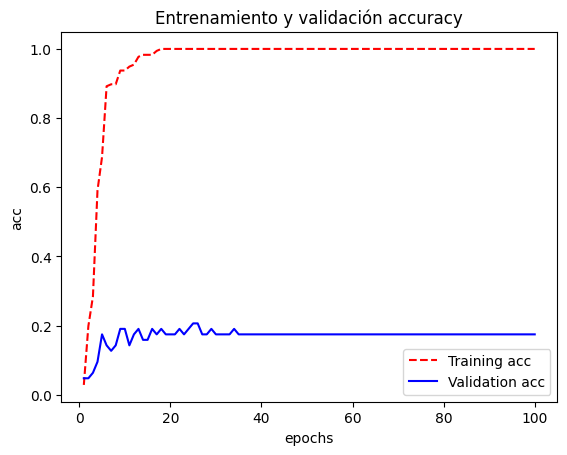

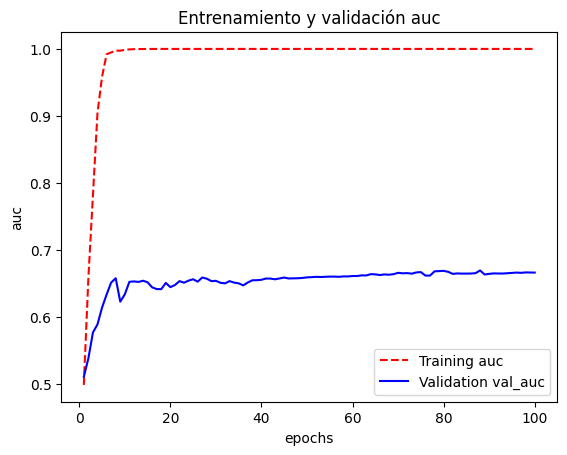

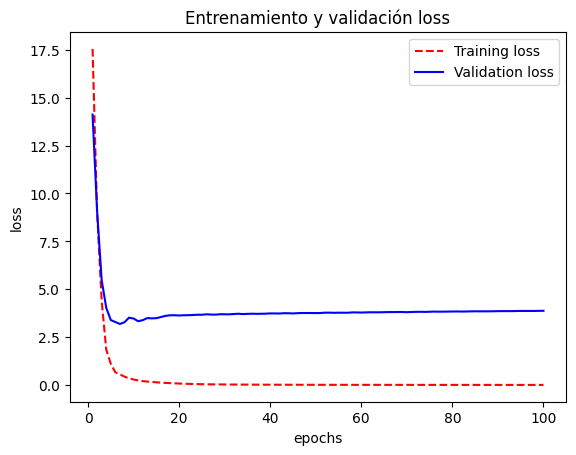

<Figure size 640x480 with 0 Axes>

In [21]:
import matplotlib.pyplot as plt
acc      = H2.history[     'accuracy' ]
val_acc  = H2.history[ 'val_accuracy' ]
loss     = H2.history[    'loss' ]
val_loss = H2.history['val_loss' ]
auc = H2.history["auc"]
val_auc = H2.history['val_auc']

epochs   = range(1,len(acc)+1,1)

plt.plot ( epochs,     acc, 'r--', label='Training acc'  )
plt.plot ( epochs, val_acc,  'b', label='Validation acc')
plt.title ('Entrenamiento y validación accuracy')
plt.ylabel('acc')
plt.xlabel('epochs')

plt.legend()
plt.figure()

plt.plot ( epochs,     auc, 'r--', label='Training auc'  )
plt.plot ( epochs, val_auc,  'b', label='Validation val_auc')
plt.title ('Entrenamiento y validación auc')
plt.ylabel('auc')
plt.xlabel('epochs')

plt.legend()
plt.figure()

plt.plot ( epochs,     loss, 'r--' , label='Training loss'  )
plt.plot ( epochs, val_loss ,  'b', label='Validation loss' )
plt.title ('Entrenamiento y validación loss'   )
plt.ylabel('loss')
plt.xlabel('epochs')

plt.legend()
plt.figure()

#ENSAMBLE VGG16 + ResNet50

In [9]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Concatenate, Flatten
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from sklearn.ensemble import VotingClassifier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [12]:
vgg_model = VGG16(include_top=False, weights='imagenet', input_shape=(480, 480, 3))

for layer in vgg_model.layers:
    layer.trainable = False


vgg_output = vgg_model.output
vgg_output = GlobalAveragePooling2D()(vgg_output)
vgg_output = Dense(256, activation='relu')(vgg_output)


resnet_model = ResNet50(include_top=False, weights='imagenet', input_shape=(480, 480, 3))

for layer in resnet_model.layers:
    layer.trainable = False


resnet_output = resnet_model.output
resnet_output = GlobalAveragePooling2D()(resnet_output)
resnet_output = Dense(256, activation='relu')(resnet_output)

merged_output = tf.keras.layers.concatenate([vgg_output, resnet_output])

predictions = Dense(21, activation='softmax')(merged_output)

ensemble_model = Model(inputs=[vgg_model.input, resnet_model.input], outputs=predictions)

ensemble_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy',"AUC","TruePositives","TrueNegatives","FalsePositives","FalseNegatives"])


In [27]:
train_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator_vgg = train_datagen.flow_from_directory(
    '/content/dataset/train',
    target_size=(480, 480),
    batch_size=32*21,
    class_mode='categorical'
)

train_generator_resnet = train_datagen.flow_from_directory(
    '/content/dataset/train',
    target_size=(480, 480),
    batch_size=32*21,
    class_mode='categorical'
)

test_generator_vgg = test_datagen.flow_from_directory(
    '/content/dataset/test',
    target_size=(480, 480),
    batch_size=32*21,
    class_mode='categorical'
)

test_generator_resnet = test_datagen.flow_from_directory(
    '/content/dataset/test',
    target_size=(480, 480),
    batch_size=32*21,
    class_mode='categorical'
)


train_images_vgg, train_labels = train_generator_vgg.next()
train_images_resnet, _ = train_generator_resnet.next()
val_images_vgg, val_labels = test_generator_vgg.next()
val_images_resnet, _ = test_generator_resnet.next()
H3 = ensemble_model.fit([train_images_vgg, train_images_resnet],train_labels,epochs=100,validation_data=([val_images_vgg, val_images_resnet], val_labels), callbacks=[early_stopping_callback])

Found 176 images belonging to 21 classes.
Found 176 images belonging to 21 classes.
Found 63 images belonging to 21 classes.
Found 63 images belonging to 21 classes.
Epoch 1/100
6/6 [==============================] - 21s 3s/step - loss: 2.8551 - accuracy: 0.2898 - auc: 0.7488 - true_positives: 13.0000 - true_negatives: 3517.0000 - false_positives: 3.0000 - false_negatives: 163.0000 - val_loss: 3.8900 - val_accuracy: 0.0000e+00 - val_auc: 0.5431 - val_true_positives: 0.0000e+00 - val_true_negatives: 637.0000 - val_false_positives: 3.0000 - val_false_negatives: 32.0000
Epoch 2/100
6/6 [==============================] - 7s 1s/step - loss: 2.4599 - accuracy: 0.3409 - auc: 0.7900 - true_positives: 10.0000 - true_negatives: 3518.0000 - false_positives: 2.0000 - false_negatives: 166.0000 - val_loss: 3.4363 - val_accuracy: 0.0000e+00 - val_auc: 0.5839 - val_true_positives: 0.0000e+00 - val_true_negatives: 640.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 32.0000
Epoch 3/100
6/6

Predicción ensamble

2/2 [==============================] - 1s 1s/step


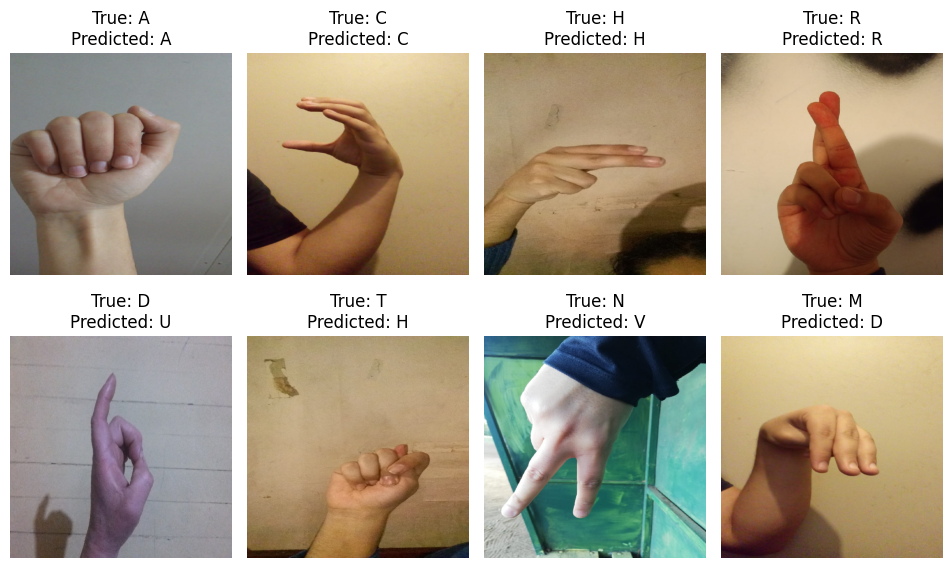

In [28]:
correctly_predicted = []
incorrectly_predicted = []

for i in range(len(test_generator_vgg)):
    batch_vgg, labels = test_generator_vgg[i]
    batch_resnet, _ = test_generator_resnet[i]

    predictions = ensemble_model.predict([batch_vgg, batch_resnet])

    for j in range(len(labels)):
        true_class = np.argmax(labels[j])
        predicted_class = np.argmax(predictions[j])

        if true_class == predicted_class:
            correctly_predicted.append((batch_vgg[j], true_class))
        else:
            incorrectly_predicted.append((batch_vgg[j], true_class, predicted_class))


plt.figure(figsize=(12, 6))
for i in range(4):
    plt.subplot(2, 5, i + 1)
    plt.imshow(correctly_predicted[i][0])
    true_letter = clase_a_letra[correctly_predicted[i][1]]
    plt.title(f'True: {clase_a_letra[correctly_predicted[i][1]]}\nPredicted: {clase_a_letra[correctly_predicted[i][1]]}')
    plt.axis('off')


for i in range(4):
    plt.subplot(2, 5, i + 6)
    plt.imshow(incorrectly_predicted[i][0])
    true_letter = clase_a_letra[incorrectly_predicted[i][1]]
    predicted_letter = clase_a_letra[incorrectly_predicted[i][2]]
    plt.title(f'True: {true_letter}\nPredicted: {predicted_letter}')
    plt.axis('off')

plt.tight_layout()
plt.show()

Metricas de ensamble

In [29]:
import matplotlib.pyplot as plt
history_dict3 = H3.history
print(history_dict3.keys())

dict_keys(['loss', 'accuracy', 'auc', 'true_positives', 'true_negatives', 'false_positives', 'false_negatives', 'val_loss', 'val_accuracy', 'val_auc', 'val_true_positives', 'val_true_negatives', 'val_false_positives', 'val_false_negatives'])


In [30]:
print("Perdida en set de entrenamiento",history_dict3["loss"][len(history_dict3["loss"])-1])
print("Perdida en set de validacion",history_dict3["val_loss"][len(history_dict3["val_loss"])-1])
print("------------------------------------------------------------------------------------")
print("Accuracy en set de entrenamiento",history_dict3["accuracy"][len(history_dict3["accuracy"])-1])
print("Accuracy en set de validacion",history_dict3["val_accuracy"][len(history_dict3["val_accuracy"])-1])
print("------------------------------------------------------------------------------------")
print("Auc en set de entrenamiento",history_dict3["auc"][len(history_dict3["auc"])-1])
print("Auc en set de validacion",history_dict3["val_auc"][len(history_dict3["val_auc"])-1])

Perdida en set de entrenamiento 0.5919328927993774
Perdida en set de validacion 4.291825294494629
------------------------------------------------------------------------------------
Accuracy en set de entrenamiento 0.9318181872367859
Accuracy en set de validacion 0.0625
------------------------------------------------------------------------------------
Auc en set de entrenamiento 0.9984762072563171
Auc en set de validacion 0.6271728277206421


In [31]:
print("Verdaderos negativos set entrenamiento: ",history_dict3["true_negatives"][len(history_dict3["true_negatives"])-1])
print("------------------------------------------------")
print("Verdaderos negativos set de testeo: ",history_dict3["val_true_negatives"][len(history_dict3["val_true_negatives"])-1])
print("------------------------------------------------")
print("Verdaderos positivos set entrenamiento: ",history_dict3["true_positives"][len(history_dict3["true_positives"])-1])
print("------------------------------------------------")
print("Verdaderos positivos set de testeo: ",history_dict3["val_true_positives"][len(history_dict3["val_true_positives"])-1])
print("------------------------------------------------")
print("Falsos negativos set entrenamiento: ",history_dict3["false_negatives"][len(history_dict3["false_negatives"])-1])
print("------------------------------------------------")
print("Falsos negativos set de testeo: ",history_dict3["val_false_negatives"][len(history_dict3["val_false_negatives"])-1])
print("------------------------------------------------")
print("Falsos positivos set entrenamiento: ",history_dict3["false_positives"][len(history_dict3["false_positives"])-1])
print("------------------------------------------------")
print("Falsos positivos set de testeo: ",history_dict3["val_false_positives"][len(history_dict3["val_false_positives"])-1])

Verdaderos negativos set entrenamiento:  3518.0
------------------------------------------------
Verdaderos negativos set de testeo:  627.0
------------------------------------------------
Verdaderos positivos set entrenamiento:  120.0
------------------------------------------------
Verdaderos positivos set de testeo:  1.0
------------------------------------------------
Falsos negativos set entrenamiento:  56.0
------------------------------------------------
Falsos negativos set de testeo:  31.0
------------------------------------------------
Falsos positivos set entrenamiento:  2.0
------------------------------------------------
Falsos positivos set de testeo:  13.0


Graficos de ensamble

<Figure size 640x480 with 0 Axes>

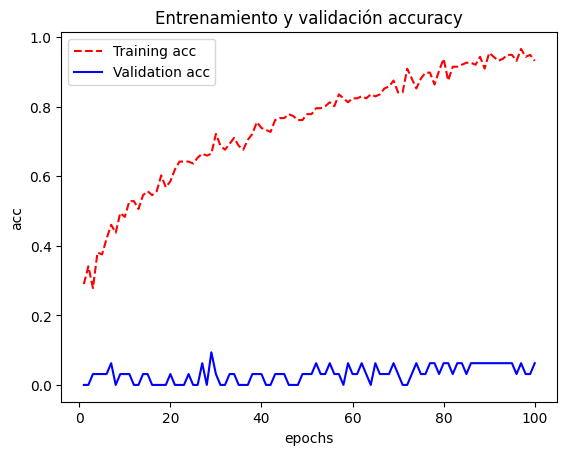

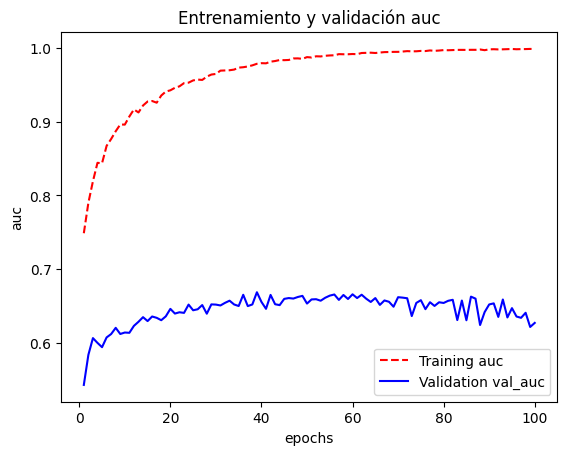

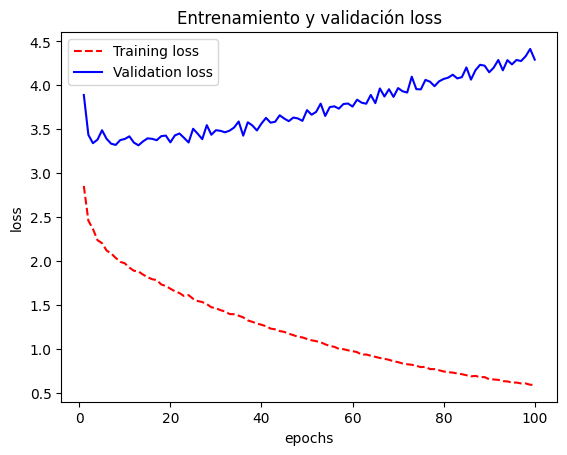

<Figure size 640x480 with 0 Axes>

In [32]:
import matplotlib.pyplot as plt
acc      = H3.history[     'accuracy' ]
val_acc  = H3.history[ 'val_accuracy' ]
loss     = H3.history[    'loss' ]
val_loss = H3.history['val_loss' ]
auc = H3.history["auc"]
val_auc = H3.history['val_auc']

epochs   = range(1,len(acc)+1,1)

plt.plot ( epochs,     acc, 'r--', label='Training acc'  )
plt.plot ( epochs, val_acc,  'b', label='Validation acc')
plt.title ('Entrenamiento y validación accuracy')
plt.ylabel('acc')
plt.xlabel('epochs')

plt.legend()
plt.figure()

plt.plot ( epochs,     auc, 'r--', label='Training auc'  )
plt.plot ( epochs, val_auc,  'b', label='Validation val_auc')
plt.title ('Entrenamiento y validación auc')
plt.ylabel('auc')
plt.xlabel('epochs')

plt.legend()
plt.figure()

plt.plot ( epochs,     loss, 'r--' , label='Training loss'  )
plt.plot ( epochs, val_loss ,  'b', label='Validation loss' )
plt.title ('Entrenamiento y validación loss'   )
plt.ylabel('loss')
plt.xlabel('epochs')

plt.legend()
plt.figure()

#Cantidad inicial de imagenes por etiqueta

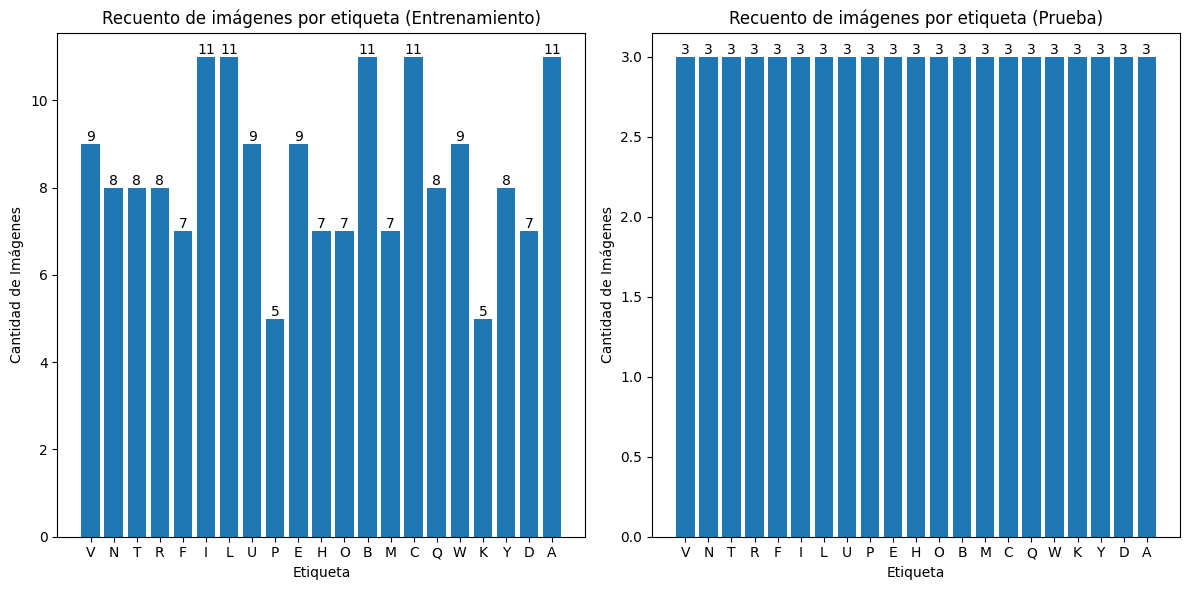

In [31]:
import os
import matplotlib.pyplot as plt

carpeta_destino_train = "/content/dataset/train"
carpeta_destino_test = "/content/dataset/test"


train_counts = {}
test_counts = {}


for etiqueta in os.listdir(carpeta_destino_train):
    train_counts[etiqueta] = len(os.listdir(os.path.join(carpeta_destino_train, etiqueta)))


for etiqueta in os.listdir(carpeta_destino_test):
    test_counts[etiqueta] = len(os.listdir(os.path.join(carpeta_destino_test, etiqueta)))


plt.figure(figsize=(12, 6))

plt.subplot(121)
bars = plt.bar(train_counts.keys(), train_counts.values())
plt.title('Recuento de imágenes por etiqueta (Entrenamiento)')
plt.xlabel('Etiqueta')
plt.ylabel('Cantidad de Imágenes')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')

plt.subplot(122)
bars = plt.bar(test_counts.keys(), test_counts.values())
plt.title('Recuento de imágenes por etiqueta (Prueba)')
plt.xlabel('Etiqueta')
plt.ylabel('Cantidad de Imágenes')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')

plt.tight_layout()
plt.show()